# Lab 1: Multi-Armed Bandits

In this lab, we will be implementing multi-armed bandit (MAB) algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# DO NOT change any code in this cell

class MAB:
    def __init__(self,K):
        self.K = K
        self.q = np.random.uniform(low=-2, high=2, size=(K,))
        self.sigma = np.random.uniform(low=0.5, high=1, size=(K,))
        
    def get_reward(self,a):
        return np.random.normal(self.q[a], self.sigma[a])

In [3]:
##############################################################
# Modify the code in this cell to complete the MAB algorithms
##############################################################

class epsilon_greedy:
    def __init__(self, K: int, epsilon: float):
        self.K = K
        self.Q = np.zeros(K)
        self.N = np.zeros(K)
        self.epsilon = epsilon
        # You can add anything
        
    def choose_a(self, t: int):
        """
        t: time step
        """
        if np.random.rand() > self.epsilon:
            # Exploit
            q_best = np.max(self.Q)
            self.arm = np.random.choice(np.where(self.Q == q_best)[0])
        else:
            # Explore
            self.arm = np.random.randint(self.K) # This is just a random action; modify the action selection
        return self.arm

    def update(self, reward: float, t: int):
        """
        reward: reward of the action
        t: time step
        """
        # use incremental sample average to update Q
        self.N[self.arm] += 1
        self.Q[self.arm] += ((reward - self.Q[self.arm]) / self.N[self.arm])
        
        return self.Q
    

class optimistic_greedy:
    def __init__(self, K: int):
        self.K = K
        self.init = 5.0
        self.Q = np.zeros(K) + self.init 
        self.N = np.zeros(K)
        # You can add anything
        
    def choose_a(self, t: int):
        """
        t: time step
        """
        q_best = np.max(self.Q)
        self.arm = np.random.choice(np.where(self.Q == q_best)[0])
        
        return self.arm

    def update(self, reward: float, t: int):
        """
        reward: reward of the action
        t: time step
        """
        
        # use incremental sample average to update Q
        self.N[self.arm] += 1
        self.Q[self.arm] += ((reward - self.Q[self.arm]) / self.N[self.arm])
        return self.Q


class UCB:
    def __init__(self, K: int):
        self.K = K
        self.Q = np.zeros(K)
        self.N = np.zeros(K)
        # You can add anything
        self.c = 0.1  # constant for UCB
        
    def choose_a(self, t: int):  
        """
        t: time step
        """
        q_est = self.Q + self.c * np.sqrt(np.log(t) / (self.N + 1e-6)) 
        q_best = np.max(q_est)
        self.arm = np.random.choice(np.where(q_est == q_best)[0])
        return self.arm

    def update(self, reward: float, t: int):
        """
        reward: reward of the action
        t: time step
        """
        # use incremental sample average to update Q
        self.N[self.arm] += 1
        self.Q[self.arm] += ((reward - self.Q[self.arm]) / self.N[self.arm])
        return self.Q

In [4]:
T = 1000 # Time horizon
K = 10 # Number of arms


In [5]:
# DO NOT change any code in this cell

## Simulation

simul_n = 5 # Number of repetitions

for simul in range(simul_n):
    
    env = MAB(K)
            
    savename = "results/MAB_K={}_id={}.csv".format(K, simul) # make sure you have "results" folder to save your logs
    
    algos = []
    algos.append(epsilon_greedy(K,0.1))
    algos.append(epsilon_greedy(K,0.01))
    algos.append(optimistic_greedy(K))
    algos.append(UCB(K))
    
    num_algos = len(algos)
    
    cumulated_reward = [ [] for _ in range(num_algos) ]
    rewards = [ [] for _ in range(num_algos) ]
    
    for t in range(1,T+1):

        for m in range(num_algos):
            a = algos[m].choose_a(t)
            reward = env.get_reward(a)
            rewards[m].append(reward)
            algos[m].update(reward,t)
            
    for m in range(num_algos):
        cumulated_reward[m].append(np.cumsum(rewards[m]))
    
    cumul_reward_array = np.vstack(cumulated_reward)
    np.savetxt(savename, cumul_reward_array, delimiter=",")

In [6]:
# DO NOT change any code in this cell

## Aggregating results

cumul_reward_list = []
for i in range(simul_n):
    cumul_reward_list.append(np.genfromtxt(
        "results/MAB_K={}_id={}.csv".format(K, i), delimiter=','))
        
total_reward = np.stack(cumul_reward_list)

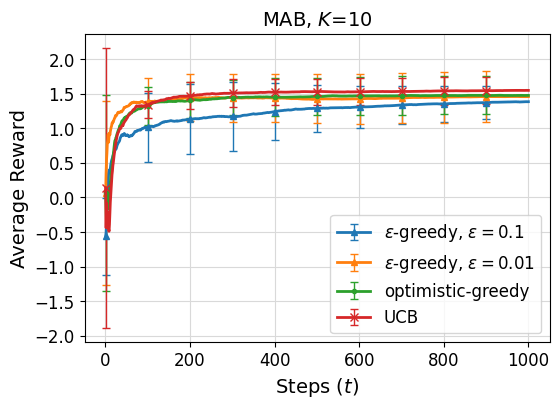

In [7]:
# DO NOT change any code in this cell

## Plotting script

fig = plt.figure(figsize=(6, 4))
plt.style.use('default')

steps=np.arange(1,T+1)
freq = int(T/10)

avg_reward_temp = total_reward/steps

avg_reward = avg_reward_temp.mean(axis=0)
sd_reward = avg_reward_temp.std(axis=0)

plt.errorbar(steps, avg_reward[0,:], sd_reward[0,:], errorevery=freq, marker='^', markevery=freq, label='$\epsilon$-greedy, $\epsilon = 0.1$', markersize=4, linewidth=2, elinewidth=1, capsize=3)
plt.errorbar(steps, avg_reward[1,:], sd_reward[1,:], errorevery=freq, marker='^', markevery=freq, label='$\epsilon$-greedy, $\epsilon = 0.01$', markersize=4, linewidth=2, elinewidth=1, capsize=3)
plt.errorbar(steps, avg_reward[2,:], sd_reward[2,:], errorevery=freq, marker='.', markevery=freq, label='optimistic-greedy', linewidth=2, elinewidth=1, capsize=3)
plt.errorbar(steps, avg_reward[3,:], sd_reward[3,:], errorevery=freq, marker='x', markevery=freq, label='UCB', linewidth=2, elinewidth=1, capsize=3)


plt.grid(color='0.85')
plt.xlabel('Steps ($t$)', size = 14)
plt.ylabel('Average Reward', size = 14)
plt.title(r'MAB, $K$={}'.format(K), size = 14)
plt.legend(loc='lower right', prop={'size': 12})
plt.tick_params(labelsize=12)

### Q1: Complete the codes for epsilon_greedy, optimistic_greedy, UCB algorithms.

Done

### Q2: Which algorithm performs the best? You can tune hyper-parameters for each algorthms to improve the performances of the algorthms.

UCB performed best. It reached faster and higher average reward than other algorithms.

### Q3: Write the code for "Gradient Bandit Algorithm" and compare with the algorithms above. Plot a new reward curve including the gradient bandit algorithm.

In [21]:
class gradient:
    def __init__(self, K: int, use_baseline: bool = False):
        self.K = K
        self.Q = np.zeros(K)
        self.N = np.zeros(K)
        # You can add anything
        self.actions = np.arange(self.K)
        self.average_reward = 0.0
        self.use_baseline = use_baseline
        self.step_size = 0.4
        
    def choose_a(self, t: int):
        """
        t: time step
        """
        exp_est = np.exp(self.Q)
        self.a_prob = exp_est / exp_est.sum()
        self.arm = np.random.choice(self.actions, p=self.a_prob)
        return self.arm

    def update(self, reward: float, t: int):
        """
        reward: reward of the action
        t: time step
        """
        self.N[self.arm] += 1

        self.average_reward += (reward - self.average_reward) / t  # \hat{R}_t
        one_hot = np.zeros(self.K)
        one_hot[self.arm] = 1
        if self.use_baseline:
            baseline = self.average_reward
        else:
            baseline = 0
        self.Q += self.step_size * (reward - baseline) * (one_hot - self.a_prob)
        
        return self.Q

In [22]:
## Simulation
def run_exp(K, T):
    simul_n = 5 # Number of repetitions

    for simul in range(simul_n):
        
        env = MAB(K)
                
        savename = "results/MAB_K={}_id={}.csv".format(K, simul) # make sure you have "results" folder to save your logs
        
        algos = []
        algos.append(epsilon_greedy(K,0.1))
        algos.append(epsilon_greedy(K,0.01))
        algos.append(optimistic_greedy(K))
        algos.append(UCB(K))
        algos.append(gradient(K, use_baseline=False))
        algos.append(gradient(K, use_baseline=True))
        num_algos = len(algos)
        
        cumulated_reward = [ [] for _ in range(num_algos) ]
        rewards = [ [] for _ in range(num_algos) ]
        
        for t in range(1,T+1):

            for m in range(num_algos):
                a = algos[m].choose_a(t)
                reward = env.get_reward(a)
                rewards[m].append(reward)
                algos[m].update(reward,t)
                
        for m in range(num_algos):
            cumulated_reward[m].append(np.cumsum(rewards[m]))
        
        cumul_reward_array = np.vstack(cumulated_reward)
        np.savetxt(savename, cumul_reward_array, delimiter=",")

    ## Aggregating results

    cumul_reward_list = []
    for i in range(simul_n):
        cumul_reward_list.append(np.genfromtxt(
            "results/MAB_K={}_id={}.csv".format(K, i), delimiter=','))
            
    total_reward = np.stack(cumul_reward_list)

    return total_reward

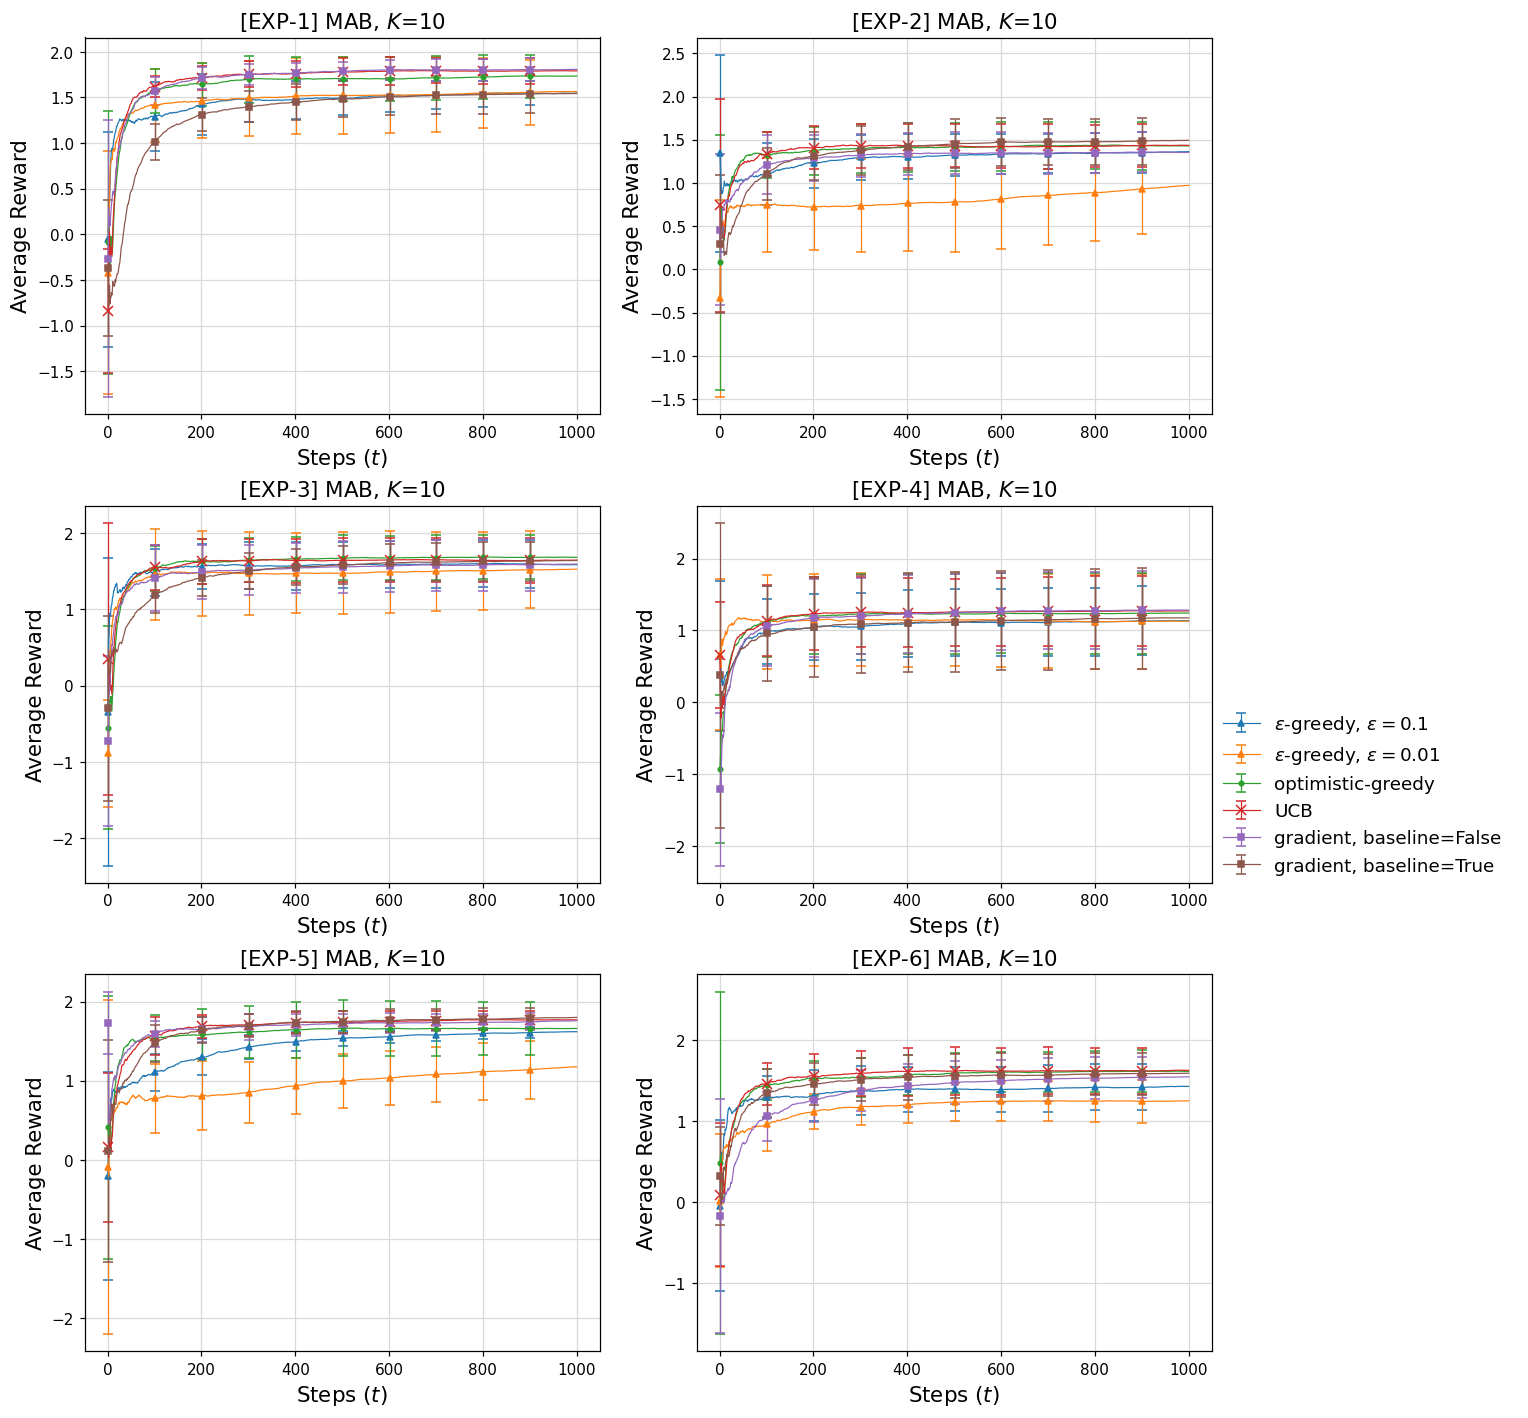

In [23]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(14, 14), dpi=110)

gs = gridspec.GridSpec(3, 10)
ax1 = fig.add_subplot(gs[0, 0:4])
ax2 = fig.add_subplot(gs[0, 4:8])
ax3 = fig.add_subplot(gs[1, 0:4])
ax4 = fig.add_subplot(gs[1, 4:8])
ax5 = fig.add_subplot(gs[2, 0:4])
ax6 = fig.add_subplot(gs[2, 4:8])
ax_legend = fig.add_subplot(gs[0:3, 8:10])

plt.style.use('default')

linewidth = 0.8
markersize = 4
elinewidth = 0.8

steps = np.arange(1, T+1)
freq = int(T/10)
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6]):
    total_reward = run_exp(K, T)
    avg_reward_temp = total_reward/steps

    avg_reward = avg_reward_temp.mean(axis=0)
    sd_reward = avg_reward_temp.std(axis=0)

    ax.errorbar(steps, avg_reward[0,:], sd_reward[0,:], errorevery=freq, marker='^', markevery=freq, label='$\epsilon$-greedy, $\epsilon = 0.1$', markersize=markersize, linewidth=linewidth, elinewidth=elinewidth, capsize=3)
    ax.errorbar(steps, avg_reward[1,:], sd_reward[1,:], errorevery=freq, marker='^', markevery=freq, label='$\epsilon$-greedy, $\epsilon = 0.01$', markersize=markersize, linewidth=linewidth, elinewidth=elinewidth, capsize=3)
    ax.errorbar(steps, avg_reward[2,:], sd_reward[2,:], errorevery=freq, marker='.', markevery=freq, label='optimistic-greedy', linewidth=linewidth, elinewidth=elinewidth, capsize=3)
    ax.errorbar(steps, avg_reward[3,:], sd_reward[3,:], errorevery=freq, marker='x', markevery=freq, label='UCB', linewidth=linewidth, elinewidth=elinewidth, capsize=3)
    ax.errorbar(steps, avg_reward[4,:], sd_reward[4,:], errorevery=freq, marker='s', markevery=freq, label='gradient, baseline=False', markersize=markersize, linewidth=linewidth, elinewidth=elinewidth, capsize=3)
    ax.errorbar(steps, avg_reward[5,:], sd_reward[5,:], errorevery=freq, marker='s', markevery=freq, label='gradient, baseline=True', markersize=markersize, linewidth=linewidth, elinewidth=elinewidth, capsize=3)


    ax.grid(color='0.85')
    ax.set_xlabel('Steps ($t$)', size = 14)
    ax.set_ylabel('Average Reward', size = 14)
    ax.set_title(f'[EXP-{i+1}] MAB, $K$={K}', size = 14)
    
lc, l = ax1.get_legend_handles_labels()
ax_legend.axis('off')
ax_legend.legend(lc, l, loc='lower right', prop={'size': 12}, bbox_to_anchor=(1.0, 0.35), ncol=1, frameon=False)
plt.tick_params(labelsize=12)
plt.tight_layout()
fig.subplots_adjust(top=0.9) 
plt.show()

### (Extra Credit): Submit your own multi-armed bandit algorithm to win the competition. Top 5 rankers will win extra 10 points for Lab 1.
You are free to design your own MAB algorithm. Your MAB algorithm algorithm should take at least K (number of arms) as input and have "choose_a()" and "update()" functions as shown in the algorithms above. We will evaluate your algorithm in new problem instances.

In [ ]:
class custom:
    def __init__(self, K: int, use_baseline: bool = True):
        self.K = K
        self.init = 1.5
        self.Q = np.zeros(K) + self.init
        self.N = np.zeros(K)
        # You can add anything
        self.actions = np.arange(self.K)
        self.average_reward = 0.0
        self.use_baseline = use_baseline
        self.step_size = 0.4
        
    def choose_a(self, t: int):  
        """
        t: time step
        """
        exp_est = np.exp(self.Q)
        self.a_prob = exp_est / exp_est.sum()
        self.arm = np.random.choice(self.actions, p=self.a_prob)
        return self.arm

    def update(self, reward: float, t: int):
        """
        reward: reward of the action
        t: time step
        """
        self.N[self.arm] += 1

        self.average_reward += (reward - self.average_reward) / t  # \hat{R}_t
        one_hot = np.zeros(self.K)
        one_hot[self.arm] = 1
        if self.use_baseline:
            baseline = self.average_reward
        else:
            baseline = 0
        self.Q += self.step_size * (reward - baseline) * (one_hot - self.a_prob)
        
        return self.Q

### Make sure to save your notebook file before submission!